In [1]:
#import packages to be used for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore
from mpl_toolkits.mplot3d import Axes3D
sns.set()
from warnings import simplefilter
simplefilter(action='ignore')

In [2]:
#read in dataset into pandas
df = pd.read_csv('BeerDataScienceProject.csv', encoding = 'ISO-8859-1')

In [3]:
#take a look at dataframe 
df.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206


In [4]:
#take a look at shape
print(df.shape)

(528870, 13)


In [5]:
#take a look at how many missing values
df.isnull().sum()

beer_ABV              20280
beer_beerId               0
beer_brewerId             0
beer_name                 0
beer_style                0
review_appearance         0
review_palette            0
review_overall            0
review_taste              0
review_profileName      115
review_aroma              0
review_text             119
review_time               0
dtype: int64

In [6]:
#take a look at properties of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528870 entries, 0 to 528869
Data columns (total 13 columns):
beer_ABV              508590 non-null float64
beer_beerId           528870 non-null int64
beer_brewerId         528870 non-null int64
beer_name             528870 non-null object
beer_style            528870 non-null object
review_appearance     528870 non-null float64
review_palette        528870 non-null float64
review_overall        528870 non-null float64
review_taste          528870 non-null float64
review_profileName    528755 non-null object
review_aroma          528870 non-null float64
review_text           528751 non-null object
review_time           528870 non-null int64
dtypes: float64(6), int64(3), object(4)
memory usage: 52.5+ MB


In [7]:
#look for any trends in dataset
df.describe()

,beer_ABV,beer_beerId,beer_brewerId,review_appearance,review_palette,review_overall,review_taste,review_aroma,review_time
count,508590.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,5.288700e+05
mean,7.017442,22098.466016,2598.423429,3.864522,3.758926,3.833197,3.765993,3.817350,1.224885e+09
std,2.204460,22158.284352,5281.805350,0.604010,0.685335,0.709962,0.669018,0.718903,7.605600e+07
min,0.010000,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,8.843904e+08
25%,5.300000,1745.000000,132.000000,3.500000,3.500000,3.500000,3.500000,3.500000,1.174613e+09
50%,6.500000,14368.000000,394.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.240366e+09
75%,8.500000,40528.000000,1475.000000,4.000000,4.000000,4.500000,4.000000,4.500000,1.288560e+09
max,57.700000,77310.000000,27980.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.326277e+09


In [8]:
#fill in missing profile name with unknown and missing text with none
df.review_profileName.fillna('unknown', inplace=True)
df.review_text.fillna('none', inplace=True)
df.isnull().sum()

beer_ABV              20280
beer_beerId               0
beer_brewerId             0
beer_name                 0
beer_style                0
review_appearance         0
review_palette            0
review_overall            0
review_taste              0
review_profileName        0
review_aroma              0
review_text               0
review_time               0
dtype: int64

In [9]:
#calculate % of missing ABV entries over total entries
20280 / 528870

0.03834590731181576

In [10]:
#since the amount is less than 5%, drop the rows without ABV since its small% and using mean ABV is not an option
df.dropna(inplace=True)
df.isnull().sum()

beer_ABV              0
beer_beerId           0
beer_brewerId         0
beer_name             0
beer_style            0
review_appearance     0
review_palette        0
review_overall        0
review_taste          0
review_profileName    0
review_aroma          0
review_text           0
review_time           0
dtype: int64

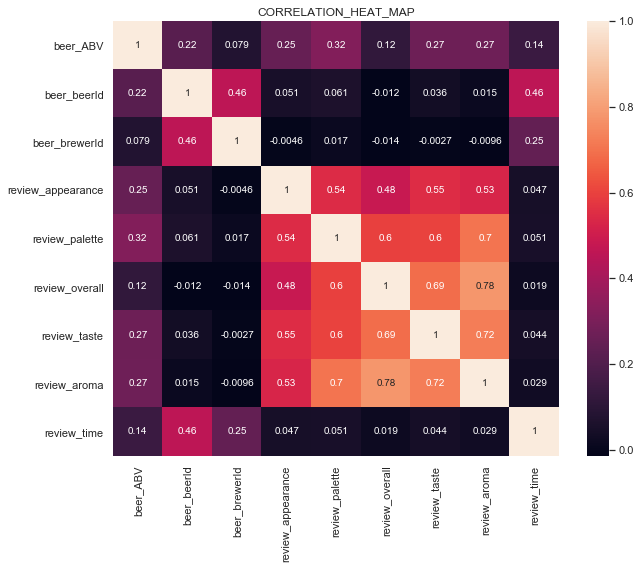

In [11]:
#look for trends/correlations by plotting a correlation heatmap
plt.subplots(figsize=(10,8))
ax = plt.axes()
ax.set_title("CORRELATION_HEAT_MAP")
corr = df.corr()
sns.heatmap(corr, annot=True, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

### Correlation heatmap shows that there is strong correlation between overall review and review_aroma.  There is also strong correlation between review_aroma and review_taste.  Finally, there is strong correlation between review_palette and review_aroma.  

### The Correlation heatmap shows a strong negative correlation between overall review and beer_brewer_Id indicating the beer review is not correlated with which brewery is serving that beer.

## Rank top 3 Breweries which produce the strongest beers?

In [12]:
#sort values in dataframe by ABV and brewerId
df_strong = df.sort_values(['beer_ABV', 'beer_brewerId'], ascending = False)
df_strong.head()


,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
12889,57.70,73368,6513,Schorschbräu Schorschbock 57%,Eisbock,4.0,4.0,4.0,4.0,kappldav123,3.5,"New world strongest beer. Very limited, only 3...",1316780901
12909,43.00,57856,6513,Schorschbräu Schorschbock 43%,Eisbock,3.5,4.0,4.0,4.0,Sunnanek,4.0,43% ABV - this is so crazy! A: Pour is warm am...,1309974178
12910,43.00,57856,6513,Schorschbräu Schorschbock 43%,Eisbock,4.0,4.0,3.5,4.0,kappldav123,4.5,"The bottle looks really great, handnumbered an...",1274469798
12911,39.44,55712,6513,Schorschbräu Schorschbock 40%,Eisbock,3.0,3.0,3.0,2.0,orangesol,3.0,Thanks to foofaa for sharing his sample with m...,1321041551
12912,39.44,55712,6513,Schorschbräu Schorschbock 40%,Eisbock,3.5,3.5,3.0,3.5,thepeter,3.5,Very lucky to get a 2oz sample of this at a ta...,1274645294


In [13]:
#filter out the dataframe even further by only looking at beers with ABV > 19
df_strong_total = df_strong[df_strong['beer_ABV'] >19]
len(df_strong_total)

458

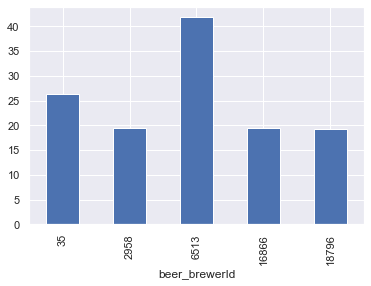

In [14]:
#perform groupby between brewery and class beer_ABV to visually see which breweries serve the strongest beer
df_strong_total.groupby('beer_brewerId').beer_ABV.mean().plot(kind='bar')

In [15]:
#take a look at same groupby mathematically since visually 2958, 16866 and 18796 appear the same
df_strong_total.groupby('beer_brewerId').beer_ABV.mean()

beer_brewerId
35       26.406542
2958     19.500000
6513     41.840000
16866    19.500000
18796    19.200000
Name: beer_ABV, dtype: float64

In [16]:
#filter out the dataframe even further to look at only the unique breweryID's with the strongest beers
df_strong_unique = df_strong_total['beer_brewerId'].unique()
len(df_strong_unique)


5

In [17]:
print(df_strong_unique)

[ 6513    35 16866  2958 18796]


### Therefore, the three brewery id's with the strongest beers are Brewery ID 6513, 35, and 16866. The top five brewery id's with the strongest beers are Brewery ID 1.) 6513, 2.) 35, 3.) 16866, 4.) 2958 and 5.) 18796.

In [18]:
#take a look at how many unique beer names are in the strong beer dataset
df_name_unique = df_strong_total['beer_name'].unique()
len(df_name_unique)

13

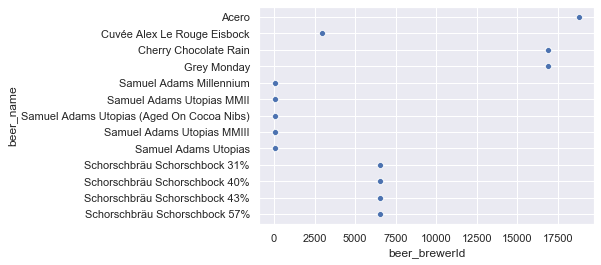

In [19]:
#plot the top 5 highest ABV serving breweries against the beer names to look for trends
sns.scatterplot(x = 'beer_brewerId', y = 'beer_name', data = df_strong_total)
plt.show()

### This shows that while brewery id 6513 serves the strongest beer that brewery id 35 serves the most different kinds of strong beers.

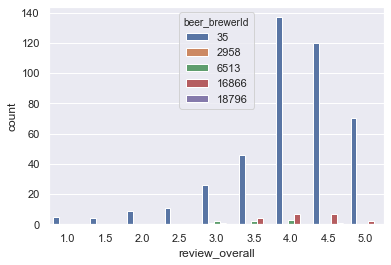

In [20]:
#plot the top 5 strongest breweries against the overall review of those breweries
sns.countplot(x='review_overall', data=df_strong_total, hue='beer_brewerId')

### This shows that even though beer_brewerId 6513 serves the strongest beers, 6513 does not have the strongest reviews. The plot shows brewer Id's 35 and 2958 have much better average reviews.

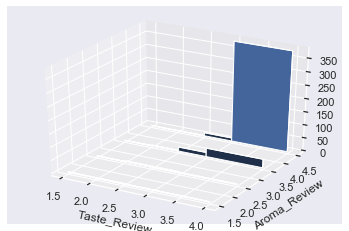

In [21]:
#take a closer look at the trends seen with the taste and aroma reviews of the strongest beers w/a 3d histogram
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
x = df_strong_total['review_taste']
y = df_strong_total['review_aroma']

hist, xedges, yedges, = np.histogram2d(x,y,bins=(4,4))
xpos, ypos = np.meshgrid(xedges[:1]+xedges[1:],yedges[:-1]+yedges[1:])
xpos = xpos.flatten()/2.
ypos = ypos.flatten()/2.
zpos = np.zeros_like (xpos)
dx = xedges [1] - xedges[0]
dy = yedges [1] - yedges[1]
dz = hist.flatten()

ax.bar3d(xpos, ypos, zpos,dx, dy, dz, color='b', zsort='average')
plt.xlabel("Taste_Review")
plt.ylabel("Aroma_Review")

plt.show()

### This shows the correlation heatmap finding that there is a strong correlation between taste and aroma reviews.  This shows that this correlation not only applies to the whole dataset but also to the strongest of beers in the dataset

## Which year did beers enjoy the highest ratings?

In [22]:
#first convert to readable datetime from unix
df[ 'review_time' ] = pd.to_datetime(df[ 'review_time' ], unit = 's' )

In [23]:
#take a look at dataframe
df.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,2009-02-16 20:57:03
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",2009-03-01 13:44:57
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",2009-03-01 14:10:04
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",2009-02-15 19:12:25
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",2010-12-30 18:53:26


In [24]:
#make sure that date is in datetime
df.dtypes

beer_ABV                     float64
beer_beerId                    int64
beer_brewerId                  int64
beer_name                     object
beer_style                    object
review_appearance            float64
review_palette               float64
review_overall               float64
review_taste                 float64
review_profileName            object
review_aroma                 float64
review_text                   object
review_time           datetime64[ns]
dtype: object

In [25]:
#get max time date stamp
df.review_time.max()

Timestamp('2012-01-11 10:10:56')

In [26]:
#get min time date stamp
df.review_time.min()

Timestamp('1998-01-10 00:00:01')

### This shows the dataset spans from 1998 to 2012 or almost 15 years.

In [27]:
#create column in data frame for year only
df['year'] = df.review_time.dt.year

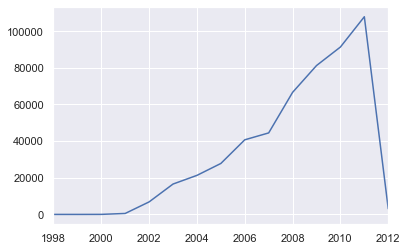

In [28]:
#plot year against count to notice any trends from year to year
df.year.value_counts().sort_index().plot()

### This interestingly shows the reviews have steadily climbed over time with the highest count of reviews in 2011

(array([728659.00000289, 729390.00000289, 730120.00000289, 730851.00000289,
        731581.00000289, 732312.00000289, 733042.00000289, 733773.00000289,
        734503.00000289]), <a list of 9 Text xticklabel objects>)

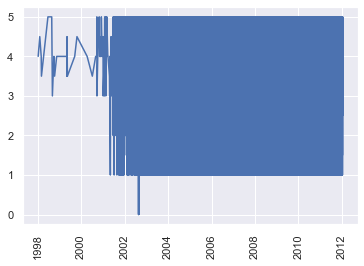

In [29]:
#take a look visually at how time and review are correlated 
df = df.sort_values('review_time', ascending = True)
plt.plot(df['review_time'],df['review_overall'])
plt.xticks(rotation = 'vertical')

### So the plot above shows that 1998, 1999 and 2000 enjoyed the highest reviews and that 2003 had the lowest reviews. 

### The above visualization also shows that 1998, 1999 and 2000 have the highest average reviews but is showing that 2002 has the lowest reviews.

In [30]:
#do a groupby between reviews and year to determine if 1998,1999, or 2000 have highest average reviews
df.groupby('year').review_overall.mean()

year
1998    4.045455
1999    4.000000
2000    4.233333
2001    3.961896
2002    3.817551
2003    3.772807
2004    3.807041
2005    3.844327
2006    3.808843
2007    3.820009
2008    3.840548
2009    3.868688
2010    3.869436
2011    3.833438
2012    3.838862
Name: review_overall, dtype: float64

### This indicates that 2000 had the highest average review and that 2003 had the lowest average review. 

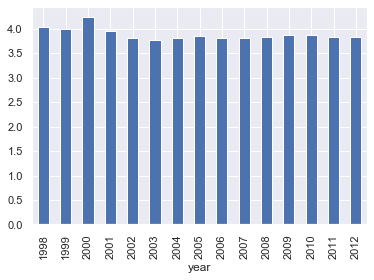

In [31]:
#perform groupby barplot between overall_review and year
df.groupby('year').review_overall.mean().plot(kind='bar')

### In conclusion, the year 2000 enjoyed the highest average beer ratings

## Based on the user’s ratings which factors are important among taste, aroma,appearance, and palette?

In [32]:
# first take a look at statistical correlation values between ratings and all other features
df.corr()['review_overall'].sort_values(ascending=False)

review_overall       1.000000
review_aroma         0.780320
review_taste         0.689299
review_palette       0.598074
review_appearance    0.483098
beer_ABV             0.119603
year                 0.020072
beer_beerId         -0.011667
beer_brewerId       -0.014277
Name: review_overall, dtype: float64

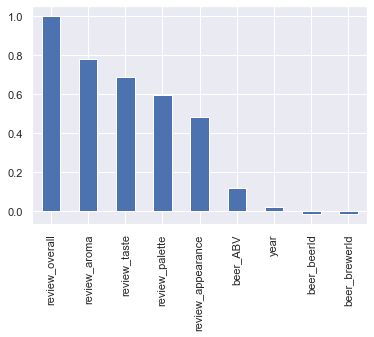

In [33]:
#now take a look visually at the correlations between reviews and aroma, taste, palette, and appearance. 
df.corr()['review_overall'].sort_values(ascending=False).plot(kind = 'bar')

### the data visualization as well as the statistical analysis shows that review aroma is the most correlated with overall user rating followed by review_taste, review_palette and review_appearance. This shows that review_appearance is the least correlated with overall user ratings.  

In [34]:
# create ml model to see which feature is the strongest in determining overall rating
x_cols = ['review_taste', 'review_palette', 'review_appearance','review_aroma']
X = df[x_cols].as_matrix()
print(X.shape)
print(type(X))

(508590, 4)
<class 'numpy.ndarray'>


In [35]:
#assign the predictor(target) variable
y = df['review_overall'].values
print(type(y))
print(y.shape)

<class 'numpy.ndarray'>
(508590,)


In [36]:
#create a random forest regressor model between the different features and the prediction of overall user rating 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)
rand_reg = RandomForestRegressor(n_estimators=100,random_state=1)
rand_reg.fit(X_train,y_train)
print("accuracy on the training subset:{:.3f}".format(rand_reg.score(X_train,y_train)))
print("accuracy on the test subset:{:.3f}".format(rand_reg.score(X_test,y_test)))

accuracy on the training subset:0.661
accuracy on the test subset:0.652


In [37]:
#create a random forest regressor model between the different features and the prediction of overall user rating 
x1_cols = ['review_aroma']
X1 = df[x1_cols].as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X1,y,random_state=1)
rand_reg = RandomForestRegressor(n_estimators=100,random_state=1)
rand_reg.fit(X_train,y_train)
print("accuracy on the training subset:{:.3f}".format(rand_reg.score(X_train,y_train)))
print("accuracy on the test subset:{:.3f}".format(rand_reg.score(X_test,y_test)))

accuracy on the training subset:0.618
accuracy on the test subset:0.620


In [38]:
#create a random forest regressor model between the different features and the prediction of overall user rating 
x2_cols = ['review_taste']
X2 = df[x2_cols].as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X2,y,random_state=1)
rand_reg = RandomForestRegressor(n_estimators=100,random_state=1)
rand_reg.fit(X_train,y_train)
print("accuracy on the training subset:{:.3f}".format(rand_reg.score(X_train,y_train)))
print("accuracy on the test subset:{:.3f}".format(rand_reg.score(X_test,y_test)))

accuracy on the training subset:0.482
accuracy on the test subset:0.488


In [39]:
#create a random forest regressor model between the different features and the prediction of overall user rating 
x3_cols = ['review_palette']
X3 = df[x3_cols].as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X3,y,random_state=1)
rand_reg = RandomForestRegressor(n_estimators=100,random_state=1)
rand_reg.fit(X_train,y_train)
print("accuracy on the training subset:{:.3f}".format(rand_reg.score(X_train,y_train)))
print("accuracy on the test subset:{:.3f}".format(rand_reg.score(X_test,y_test)))

accuracy on the training subset:0.367
accuracy on the test subset:0.372


In [40]:
#create a random forest regressor model between the different features and the prediction of overall user rating 
x4_cols = ['review_appearance']
X4 = df[x4_cols].as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X4,y,random_state=1)
rand_reg = RandomForestRegressor(n_estimators=100,random_state=1)
rand_reg.fit(X_train,y_train)
print("accuracy on the training subset:{:.3f}".format(rand_reg.score(X_train,y_train)))
print("accuracy on the test subset:{:.3f}".format(rand_reg.score(X_test,y_test)))

accuracy on the training subset:0.238
accuracy on the test subset:0.243


### Running the features through a predictive machine learning model for user rating shows there is not much difference in accuracy between using all four features and just using the review_aroma feature which again confirms that review_aroma is the most important factor amongst the four features for overall user rating

## If you were to recommend 3 to 5 beers to your friends based on this data which ones will you recommend?

In [41]:
#sort from most important feature to least; take a look at dataset
df_ratings = df.sort_values(['review_overall', 'review_aroma', 'review_taste','review_palette','review_appearance'], ascending = False)
df_top_ratings = df_ratings[0:2000]
df_top_ratings.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time,year
45765,4.4,429,1,Pilsner Urquell,Czech Pilsener,5.0,5.0,5.0,5.0,BarnacleBill,5.0,You have been sentenced to drinking only one b...,2000-10-31 17:49:26,2000
505549,6.1,56973,132,Shakespeare Oatmeal Stout,Oatmeal Stout,5.0,5.0,5.0,5.0,esprit,5.0,"If you love Stout, you have to love this one.....",2001-01-30 13:32:38,2001
374477,8.0,33,22,Maudite,Belgian Strong Dark Ale,5.0,5.0,5.0,5.0,suglis,5.0,A fine Belgian-style beer at less the cash.,2001-02-01 15:10:09,2001
489478,5.3,353,132,Mocha Porter,American Porter,5.0,5.0,5.0,5.0,Brent,5.0,Very bold with tons of coffee/dark chocolate n...,2001-03-08 09:30:51,2001
518395,5.0,571,113,Samuel Smith's Oatmeal Stout,Oatmeal Stout,5.0,5.0,5.0,5.0,grdahl,5.0,Quite possibly the best beer on earth. A bit p...,2001-06-22 23:20:51,2001


In [42]:
#filter dataset using previous data analysis that 2002 had the highest reviews in beer
df_2002_ratings = df_top_ratings[df_top_ratings['year'] == 2002]
len(df_2002_ratings)

79

In [43]:
#remove duplicates of same beer name
df_2002_ratings = df_2002_ratings.drop_duplicates(subset = 'beer_name', keep = 'first')
print(len(df_2002_ratings))
df_2002_ratings.head()

53


,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time,year
247611,9.0,2512,215,Chimay Grande Réserve (Blue),Belgian Strong Dark Ale,5.0,5.0,5.0,5.0,John,5.0,Presentation: 33cl (11.2oz.) capped bottle. Ex...,2002-01-21 13:17:39,2002
505537,6.1,56973,132,Shakespeare Oatmeal Stout,Oatmeal Stout,5.0,5.0,5.0,5.0,fdoosey,5.0,"I don't think Rogue makes any bad beer, which ...",2002-02-01 13:13:25,2002
488264,6.5,355,132,Dead Guy Ale,Maibock / Helles Bock,5.0,5.0,5.0,5.0,budgood1,5.0,"this is a maibock, not an ale. has a cloudy or...",2002-02-02 23:31:58,2002
312171,4.9,1879,35,Samuel Adams Cream Stout,Milk / Sweet Stout,5.0,5.0,5.0,5.0,fdoosey,5.0,My bias for stouts is what kept me from becomi...,2002-02-12 10:09:18,2002
284183,9.5,47785,35,Samuel Adams Double Bock (Imperial Series),Doppelbock,5.0,5.0,5.0,5.0,fdoosey,5.0,"This is my kind of beer. Very strong, very ric...",2002-02-12 10:27:19,2002


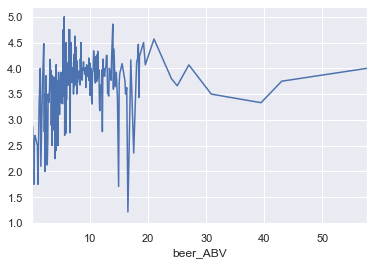

In [44]:
#take a look at if there are any trends between ABV and overall_review of beers
df.groupby('beer_ABV').review_overall.mean().plot()

### Since the visualization for ABV sems inconclusive, utilize sentiment text analysis to determine which are the top three rated beers 